<a href="https://colab.research.google.com/github/lamortizme/Instrumentos/blob/main/gala.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [106]:
#importación de librerias necesarias 
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from mpl_toolkits.mplot3d import Axes3D
from numpy.fft import fft2, fftshift, ifft2 

In [107]:
wl= 550e-6 #longitud de onda
Ly=4200
Lx= 3180 #medida en milimetros del objeto
Nx=500
Ny=649 #número de particiones del objeto (número de pixeles)
dx= Lx/Nx #tamaño de particiones del objeto (tamaño pixel)
dy= Ly/Ny
k= 2*np.pi/wl
dfx=1/(dx*Nx)
dfy=1/(dy*Ny)
print(dx,dy)

6.36 6.471494607087828


In [108]:

def pmask(a,b,radius,Nx,Ny):
  t, s = np.ogrid[-a:Nx-a,-b:Ny-b]
  mask = (t)**2 + (s)**2 <= radius*radius
  array = np.zeros((Nx,Ny))
  array[mask] = 1.
  return array



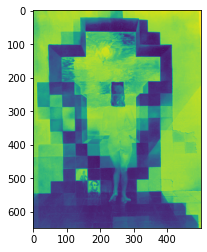

In [109]:
img = cv2.imread('a.jpg',0)
#img = cv2.imread('a.jpg', cv2.IMREAD_GRAYSCALE)
#img = cv2.threshold(img, 180, 255, cv2.THRESH_BINARY)[1]
img= np.array(img)
plt.imshow(img)
M,N= np.shape(img)

In [112]:
fac=4.2  #factor de desfase numérico
z2=17
z1=12000


def simulacion (img,z1,wl):
  z1=z1/fac
  rpupila=3/(z1*wl)
  mn=-z2/z1
  h= pmask((int(M/2)),(int(N/2)),mn*rpupila/dfx,M,N)*np.exp(1j*0)

  U=np.fft.fft2(img)
  U=np.fft.fftshift(U)
  Uf=np.fft.ifft2(h*U)

  #plt.imshow(abs(Uf*Uf))
  #print(rpupila)
  #plt.show()

  return (abs(Uf*Uf))


Text(0.5, 1.0, '18m')

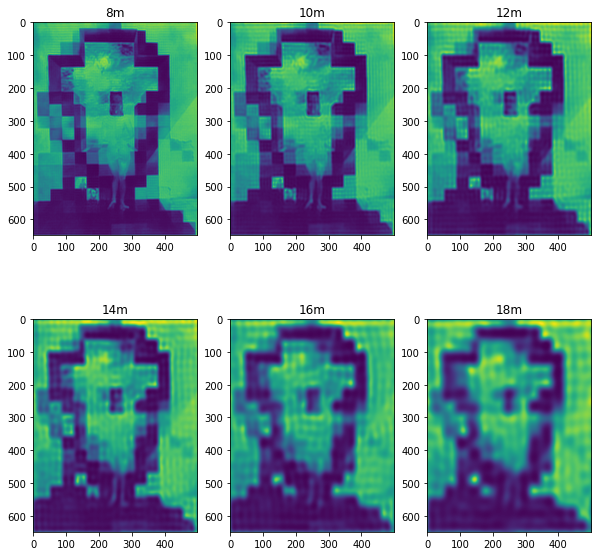

In [113]:
fig, ax= plt.subplots (2,3, figsize=(10,10))
ax [0][0].imshow (simulacion(img,8000,wl))
ax [0][0].set_title ('8m')
ax [0][1].imshow (simulacion(img,10000,wl))
ax [0][1].set_title ('10m')
ax [0][2].imshow (simulacion(img,12000,wl))
ax [0][2].set_title ('12m')
ax [1][0].imshow (simulacion(img,14000,wl))
ax [1][0].set_title ('14m')
ax [1][1].imshow (simulacion(img,16000,wl))
ax [1][1].set_title ('16m')
ax [1][2].imshow (simulacion(img,18000,wl))
ax [1][2].set_title ('18m')
